Clustering_27-feb-25
Nonhirarchical Clustering:
K means K value use in stats. bhot sara cluster cluster hogaya.. kuch kuch to.

In [145]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.cluster import KMeans


In [146]:
from sklearn.metrics import pairwise_distances
from sklearn import preprocessing

In [147]:
utilities_df = pd.read_csv('EastWestAirlinesCluster.csv')
# set row names to the utilities column
utilities_df.set_index('Balance', inplace=True)
utilities_df = utilities_df.apply(lambda x: x.astype('float64'))


In [148]:
# compute Euclidean distance
d = pairwise_distances(utilities_df, metric='euclidean')
df_distance = pd.DataFrame(d, columns=utilities_df.index, index=utilities_df.index)
df_distance

Balance,28143,19244,41354,14776,97752,16420,84914,20856,443003,104860,...,2622,11310,39142,11181,3974,18476,64385,73597,54899,3016
Balance,,,,,,,,,,,,,,,,,,,,,
28143,0.000,52.029,3949.148,329.528,43176.043,183.483,27308.012,5082.537,4161.781,28275.494,...,7036.246,8417.175,16328.583,6925.604,6895.674,10827.459,6942.880,26195.544,6917.907,6897.324
19244,52.029,0.000,3908.558,285.458,43135.054,216.613,27267.023,5041.296,4146.110,28234.467,...,7001.879,8371.872,16280.208,6894.838,6868.096,10778.940,6911.827,26149.006,6889.633,6871.935
41354,3949.148,3908.558,0.000,3623.929,39232.150,4124.029,23359.044,1158.392,4522.002,24330.425,...,7349.081,6966.142,12869.994,7613.210,7874.167,8199.876,7602.020,22417.865,7825.798,8056.548
14776,329.528,285.458,3623.929,0.000,42850.378,500.105,26982.044,4756.598,4049.008,27949.690,...,6936.139,8199.779,16016.121,6857.063,6853.641,10551.597,6871.959,25870.361,6869.633,6872.642
97752,43176.043,43135.054,39232.150,42850.378,0.000,43349.794,15953.888,38093.844,41584.820,14902.861,...,42282.005,38938.376,29204.444,42968.066,43525.697,35489.765,42918.620,19229.409,43371.338,43886.117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18476,10827.459,10778.940,8199.876,10551.597,35489.765,10930.887,20167.986,7578.683,10295.398,21061.047,...,6902.900,3509.711,6459.145,7598.638,8162.453,0.000,7546.655,16923.183,8030.607,8527.349
64385,6942.880,6911.827,7602.020,6871.959,42918.620,6915.760,27381.387,8067.950,7894.806,28306.579,...,644.092,4040.029,14000.026,53.917,616.011,7546.655,0.000,24466.001,693.844,981.022
73597,26195.544,26149.006,22417.865,25870.361,19229.409,26350.439,7176.916,21324.088,24961.325,7539.182,...,23822.001,20426.003,10466.022,24518.001,25082.001,16923.183,24466.001,0.000,24952.011,25447.002


## Normalizing Data And Computing Distance

In [149]:
# scikit-learn uses population standard deviation
utilities_df_norm = utilities_df.apply(preprocessing.scale, axis=0)
# pandas uses sample standard deviation
utilities_df_norm = (utilities_df - utilities_df.mean())/utilities_df.std()

In [150]:
scaler = preprocessing.StandardScaler()
utilities_df_norm = pd.DataFrame(scaler.fit_transform(utilities_df), 
                                 columns=utilities_df.columns, 
                                 index=utilities_df.index)


In [151]:

pd.DataFrame(utilities_df_norm, columns=utilities_df.index, index=utilities_df.index)


Balance,28143,19244,41354,14776,97752,16420,84914,20856,443003,104860,...,2622,11310,39142,11181,3974,18476,64385,73597,54899,3016
Balance,,,,,,,,,,,,,,,,,,,,,
28143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [45.0, 45.0, 63.75, 63.75],
  [95.0, 95.0, 105.0, 105.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [100.0, 100.0, 123.75, 123.75],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [155.0, 155.0, 172.5, 172.5],
  [111.875, 111.875, 163.75, 163.75],
  [54.375, 54.375, 137.8125, 137.8125],
  [205.0, 205.0, 215.0, 215.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [255.0, 255.0, 272.5, 272.5],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [305.0, 305.0, 322.5, 322.5],
  [295.0, 295.0, 313.75, 313.75],
  [263.75, 263.75, 304.375, 304.375],
  [232.5, 232.5, 284.0625, 284.0625],
  [210.0, 210.0, 258.28125, 258.28125],
  [385.0, 385.0, 395.0

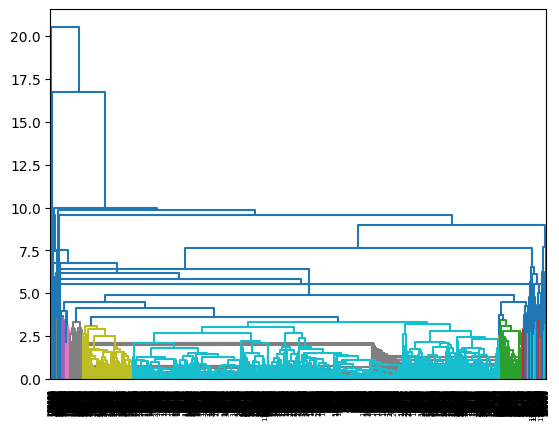

In [152]:
Z = linkage(utilities_df_norm, method='single')
dendrogram(Z, labels=utilities_df_norm.index, color_threshold=2.75)
Z = linkage(utilities_df_norm, method='average')
dendrogram(Z, labels=utilities_df_norm.index, color_threshold=3.6)

In [153]:
# Normalize distances
utilities_df_norm = utilities_df.apply(preprocessing.scale, axis=0)
kmeans = KMeans(n_clusters=6, random_state=0).fit(utilities_df_norm)

## Code for K-means

In [154]:
memb = pd.Series(kmeans.labels_, index=utilities_df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ':', ', '.join(map(str, item.index))) 

0 : 20856, 13958, 23354, 185681, 19221, 23193, 2176, 60313, 619393, 288865, 36924, 121395, 36298, 230715, 47457, 4340, 40284, 48433, 20508, 143566, 64824, 8053, 28667, 43498, 298911, 56906, 295638, 969559, 122705, 16583, 48333, 17469, 19823, 145074, 101101, 125948, 160447, 100640, 44182, 152945, 80331, 352508, 149285, 106961, 28086, 60230, 6663, 127807, 8933, 24523, 28621, 23184, 27381, 8298, 75039, 133309, 24051, 11449, 182317, 285116, 2075, 15221, 45225, 96098, 25279, 35065, 105769, 145726, 156230, 28218, 179559, 119977, 766419, 52060, 455228, 42363, 13812, 87938, 13680, 22080, 80214, 53985, 138020, 15113, 146263, 54842, 267640, 109087, 68286, 68464, 251286, 17575, 50431, 74579, 106773, 229397, 34170, 139849, 26080, 82528, 10954, 62396, 40645, 84035, 2701, 2318, 11070, 910, 22878, 3305, 109248, 18177, 413509, 31478, 17445, 59552, 28931, 202636, 8561, 81419, 178919, 19702, 213849, 40418, 176849, 148915, 11613, 11143, 133445, 37904, 112843, 117240, 7216, 41487, 39601, 46142, 146599, 32

In [155]:
pd.set_option('display.precision', 3)
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=utilities_df_norm.columns)
centroids



,ID#,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.253,0.250,-0.228,-0.098,-0.063,-0.242,-0.037,0.011,0.022,0.253,1.288
1,-0.428,-0.031,1.604,-0.098,0.249,1.483,0.902,-0.048,-0.041,0.427,0.577
2,-0.748,-0.125,-0.439,-0.098,-0.058,-0.468,-0.372,-0.207,-0.226,0.727,-0.767
3,-0.263,0.611,0.211,-0.098,-0.063,0.792,1.940,4.088,4.406,0.292,0.924
4,0.219,-0.156,-0.668,9.038,-0.063,-0.102,0.618,0.088,0.220,-0.072,0.052
5,1.036,-0.085,-0.507,-0.098,-0.063,-0.474,-0.447,-0.201,-0.232,-1.026,-0.616


In [156]:
# calculate the distances of each data point to the cluster centers
distances = kmeans.transform(utilities_df_norm)
# find closest cluster for each data point
minSquaredDistances = distances.min(axis=1) ** 2

In [157]:
df = pd.DataFrame({'squaredDistance': minSquaredDistances, 'cluster': kmeans.labels_},
    index=utilities_df_norm.index)

In [158]:
for cluster, data in df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')

Cluster 0 (767 members): 4897.67 within cluster 
Cluster 1 (789 members): 8407.30 within cluster 
Cluster 2 (1013 members): 2141.91 within cluster 
Cluster 3 (120 members): 2899.29 within cluster 
Cluster 4 (43 members): 730.37 within cluster 
Cluster 5 (1267 members): 3226.41 within cluster 


In [159]:
distance_matrix = pairwise_distances(kmeans.cluster_centers_, metric='euclidean')
df_distance = pd.DataFrame(distance_matrix)
df_distance

,0,1,2,3,4,5
0,0.000,2.821,2.269,6.424,9.284,2.729
1,2.821,0.000,3.430,6.407,9.611,3.993
2,2.269,3.430,0.000,7.147,9.337,2.508
3,6.424,6.407,7.147,0.000,11.047,7.349
4,9.284,9.611,9.337,11.047,0.000,9.332
5,2.729,3.993,2.508,7.349,9.332,0.000


c:\Users\drish\anaconda3\envs\elephant3.12\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:421: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(x[0], x[-1])


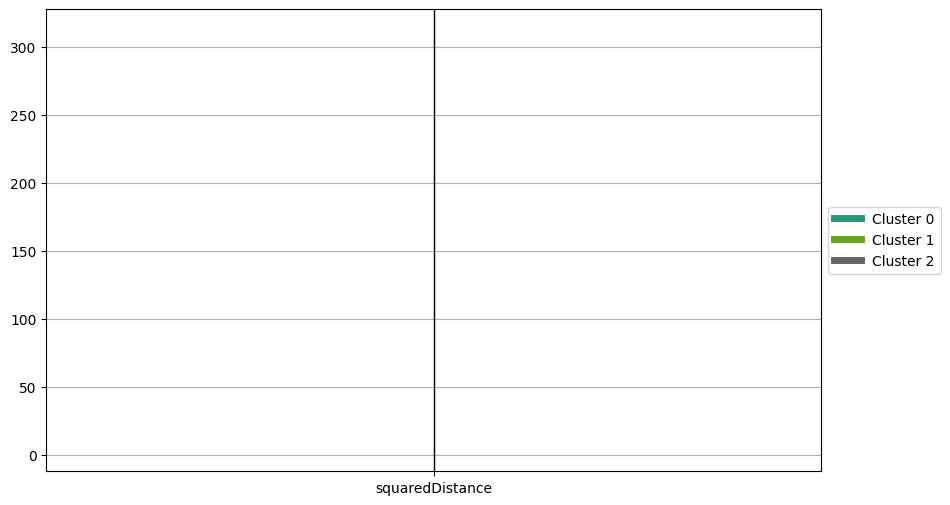

In [160]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df)

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df.columns)
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
plt.figure(figsize=(10,6))
parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

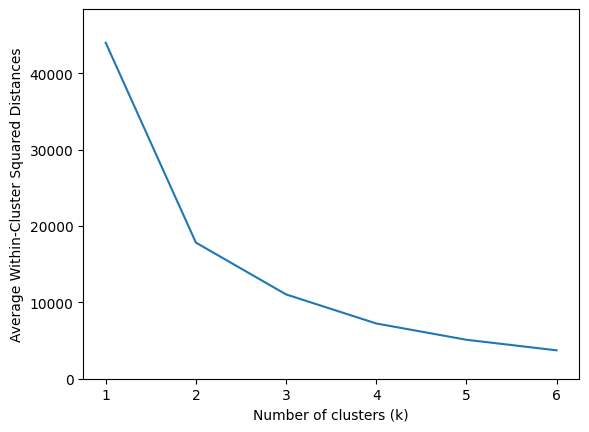

In [161]:
inertia = []
for n_clusters in range(1, 7):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(utilities_df_norm)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 7), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()